# Objectif :
Améliorer le temps, le coût et la qualité de l’embauche dans le cadre d’un recrutement aléatoire. L’objectif est de minimiser le
temps et le coût de l’embauche et de maximiser la qualité de l’embauche. Vous
pouvez mettre en pratique ici les méthodes d’ANOVA, de corrélation et de régression linéaire multiple afin d’effectuer l’analyse prédictive avec cet ensemble de
données.

# Plan 
- (a) Présentation du problème et des objectifs de l’étude ;
- (b) Présentation des données, description rapide des données (nombre d’observations,
de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) ;
- (c) Préparation des données (recodages, normalisations, etc.) ;
- (d) Définition et estimation du modèle explicatif et/ou prédictif à partir des données ;
- (e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage ;
- (f) Interprétation, bilan et conclusion.

In [114]:
import pandas as pd
import skimpy
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import statsmodels.stats.descriptivestats as ds
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder


## Importation des données :

In [33]:
df = pd.read_csv('Time-Cost-Quality of Hire.csv', 
                 sep=';')

In [34]:
df.head(5)

,Sl. No,Fiscal Year,Quarter,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
0,1,2018,1,Production,04/01/2018,03/02/2018,Production Technician I,Job Boards,External,Fully Meets,F,744000,2625,30,41,45,95,47
1,2,2018,1,Production,05/01/2018,02/02/2018,Production Technician I,Agency,External,Fully Meets,F,744000,89280,28,41,82,95,47
2,3,2018,1,Production,04/02/2018,05/04/2018,Production Technician I,LinkedIn,External,Exceeds,F,660000,4000,60,41,26,85,48
3,4,2018,1,IT,04/02/2018,03/03/2018,Software Engineer,Agency,External,Fully Meets,F,960000,115200,27,41,28,85,48
4,5,2018,1,Production,04/02/2018,04/03/2018,Production Technician I,Career Portal,External,Fully Meets,M,660000,10000,28,41,34,93,51


## b) Présentation des données, description rapide des données (nombre d’observations, de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) 

- Cibles : Temps, coût et qualité d'embauche

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sl. No                 64 non-null     int64 
 1   Fiscal Year            64 non-null     int64 
 2   Quarter                64 non-null     int64 
 3   Department             64 non-null     object
 4   Job Open Date          64 non-null     object
 5   Hire Date              64 non-null     object
 6   Job Title              64 non-null     object
 7   Source of Hire         64 non-null     object
 8   Type of Hire           64 non-null     object
 9   PerformanceScore       64 non-null     object
 10  Sex                    64 non-null     object
 11  Yearly PayScale (Yen)  64 non-null     int64 
 12  Cost of Hire           64 non-null     int64 
 13  Time to Hire (Days)    64 non-null     int64 
 14  Quality of Hire        64 non-null     int64 
 15  Engagement             64

In [36]:
df.isna().mean() * 100


Sl. No                   0.0
Fiscal Year              0.0
Quarter                  0.0
Department               0.0
Job Open Date            0.0
Hire Date                0.0
Job Title                0.0
Source of Hire           0.0
Type of Hire             0.0
PerformanceScore         0.0
Sex                      0.0
Yearly PayScale (Yen)    0.0
Cost of Hire             0.0
Time to Hire (Days)      0.0
Quality of Hire          0.0
Engagement               0.0
Ramp Up Time             0.0
Culture Fit (%)          0.0
dtype: float64

In [37]:
df.describe()

,Sl. No,Fiscal Year,Quarter,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
count,64.000000,64.0,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,2018.0,2.703125,4.914450e+05,18032.500000,35.312500,79.437500,50.234375,76.812500,82.109375
std,18.618987,0.0,1.064278,2.074369e+05,31730.556101,13.033382,16.271384,21.767707,22.953282,12.812590
min,1.000000,2018.0,1.000000,1.680000e+05,2625.000000,20.000000,41.000000,26.000000,24.000000,47.000000
25%,16.750000,2018.0,2.000000,3.405000e+05,3656.250000,27.750000,81.500000,34.750000,67.250000,84.000000
50%,32.500000,2018.0,3.000000,4.773000e+05,10000.000000,31.000000,85.000000,41.000000,84.000000,85.000000
75%,48.250000,2018.0,4.000000,6.600000e+05,10000.000000,34.250000,89.000000,71.000000,91.250000,87.000000
max,64.000000,2018.0,4.000000,1.008000e+06,120960.000000,88.000000,94.000000,96.000000,105.000000,95.000000


In [38]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 64     │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA ┃ NA % ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Sl. No                │  0 │    0 │   32.5 │  18.62 │      1 │  16.75 │   32.5 │  48.25 │      64 │ █▇█▇██ │  │
│ │ Fiscal Year           │  0 │    0 │   2018 │      0 │   2018 │   2018 │   2018 │   2018 │    2018 │     █  │  │
│ │ Quarter               │  0 │    0 │  2.703 │  1.064 │      1 │      2 │      3 │      4 │       4 │ ▄ ▆ █▇ │  │
│ │ Yearly PayScale (Yen) │  0 │    0 │ 491400 │ 207400 │ 168000 │ 340500 │ 477300 │ 660000 │ 1008000 │ ▅█▇▃▄▁ │  │
│ │ Cost of Hire          │  0 │    0 │  18030 │  31730 │   2625 │   3656 │  10000 │  10000 │  121000 │ █   ▁  │  │
│ │ Time to Hire (Days)   │  0 │    0 │  35.31 │  13.03 │     20 │  27.75 │     31 │  34.25 │      88 │  █▃▁▂  │  │
│ │ Quality of Hire       │  0 │    0 │  79.44 │  16.27 │     41 │   81.5 │     85 │     89 │      94 │ ▂▁▁▁▅█ │  │
│ │ Engagement            │  0 │    0 │  50.23 │  21.77 │     26 │  34.75 │     41 │     71 │      96 │ █▄▁▁▃▂ │  │
│ │ Ramp Up Time          │  0 │    0 │  76.81 │  22.95 │     24 │  67.25 │     84 │  91.25 │     105 │ ▃ ▃▄█▆ │  │
│ │ Culture Fit (%)       │  0 │    0 │  82.11 │  12.81 │     47 │     84 │     85 │     87 │      95 │ ▂   █▆ │  │
│ └───────────────────────┴────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Departmen │  0 │    0 │ IT        │ Productio │ IT        │ Sales     │      7.75 │         1 │         64 │  │
│ │ t         │    │      │           │ n         │           │           │           │           │            │  │
│ │ Job Open  │  0 │    0 │ 04/01/201 │ 04/01/201 │ 01/04/201 │ 11/11/201 │        10 │         1 │         64 │  │
│ │ Date      │    │      │ 8         │ 8         │ 8         │ 8         │           │           │            │  │
│ │ Hire Date │  0 │    0 │ 03/02/201 │ 03/02/201 │ 01/02/201 │ 11/06/201 │        10 │         1 │         64 │  │
│ │           │    │      │ 8         │ 8         │ 9         │ 8         │           │           │            │  │
│ │ Job Title │  0 │    0 │ Software  │ Productio │ IT  

## Variables Qualitatives
- Departement : Équipe réalisant l'embauche. 
- Job Open : Date de début de recherche d'un employé. 
- Hire Date : Date d'embauche ou date où le besoin a été rempli. 
- Job Title : Intitulé de la position. 
- Source of Hire : Canal par lequel l'employé a été trouvé. 
- Type of Hire : Fait que l'embauché soit connu de quelqu'un déjà à l'entreprise.  
- Performance Score : Fait que la personne replisse ou non les atteintes. 
- Sex : Genre de la personne embauché. 
## Variables Quantitatives 
- Sl.No : Nombre du salarié. Numéro de la ligne. 
- Fiscal Year : Année fiscale. 
- Quarter : Trimestre. 
- Yearly PayScale (Yen) : Salaire annuel en Yen.
- Cost of Hire : Coût de l'embauche. 
- Time of Hire (Days) : Temps que cela à pris d'embaucher la personne concerné.
- Quality of Hire :  Métrique de qualité de l'employé. 
- Engagement : Investissement personnel. 
- Ramp up Time : Temps de montée en puissance de l'employée. 
- Culture Fit (%) : Adaptation culturelle de l'employée. 
### Variables à changer de type : 
- Hire Date
- Job Open
### Pas d'intérêt à traiter : 
- Fiscal Year : Une seule modalité 

## Analyse Univarié Qualitatif
Hire Date et Job Open semble être une variable qui n'est pas catégorielle mais qui devrait \
être considérée comme numérique. Tout de même, elle semble être résumé par la durée d'embauche.\
A mon avis il existerait une certaine rédondance. 

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/1668073487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['PerformanceScore'], palette ='husl')


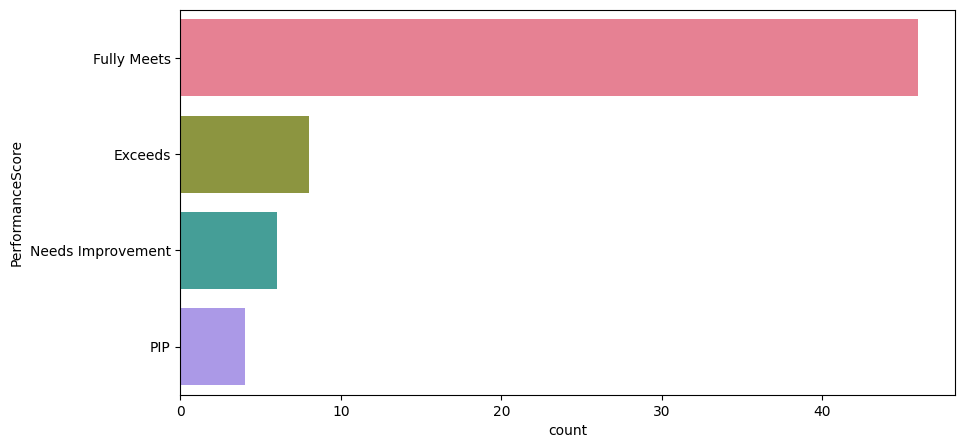

In [39]:
plt.figure(figsize =(10,5))
sns.countplot(df['PerformanceScore'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/3130837343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['Department'], palette='husl')


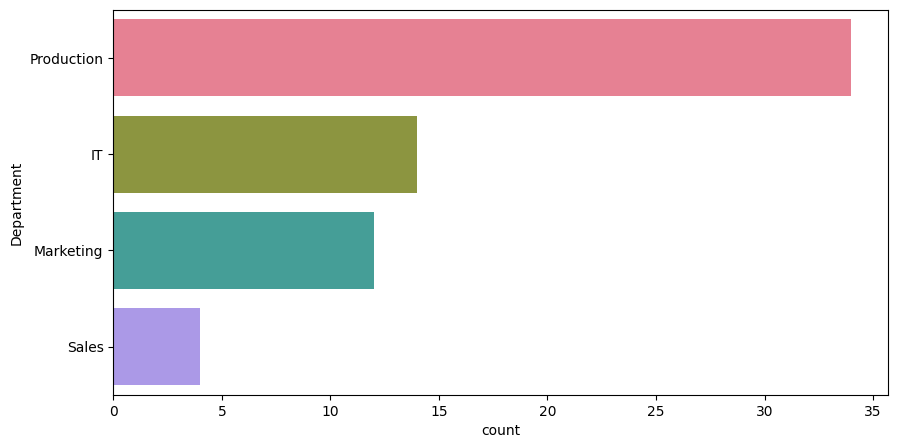

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data=df['Department'], palette='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/1223814154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Job Title'], palette ='husl')


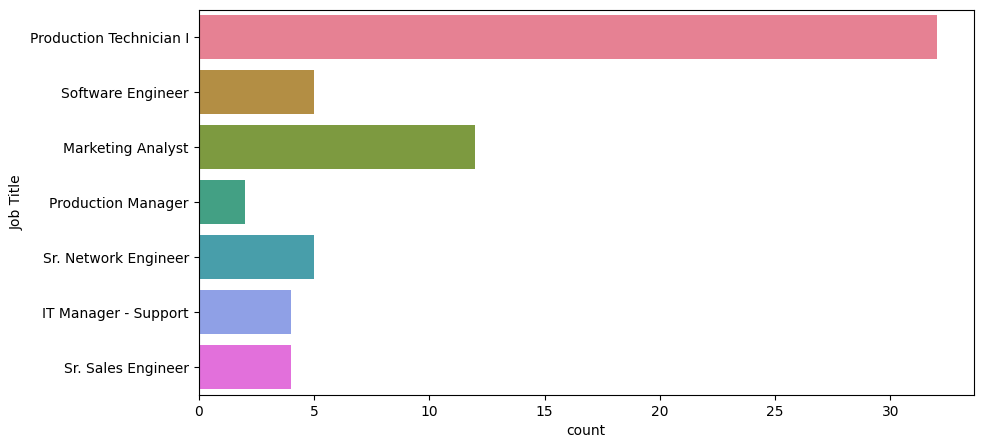

In [41]:
plt.figure(figsize =(10,5))
sns.countplot(df['Job Title'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/2058952572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Source of Hire'], palette ='husl')


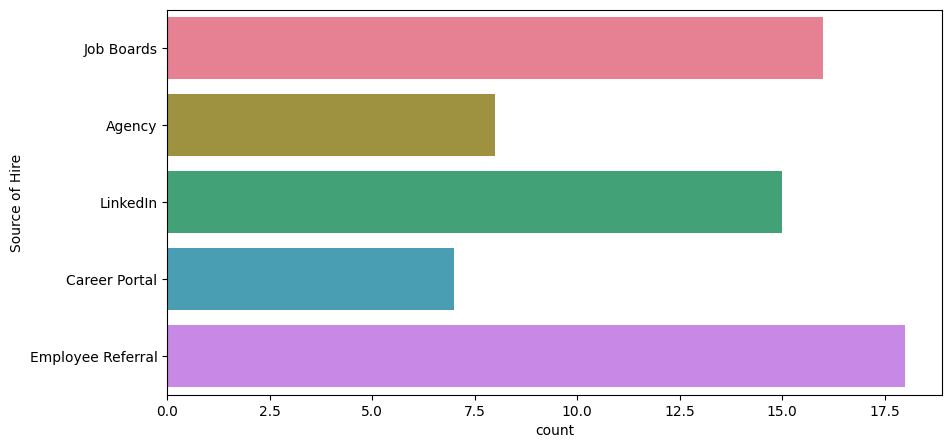

In [42]:
plt.figure(figsize =(10,5))
sns.countplot(df['Source of Hire'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/1052710344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Type of Hire'], palette ='husl')


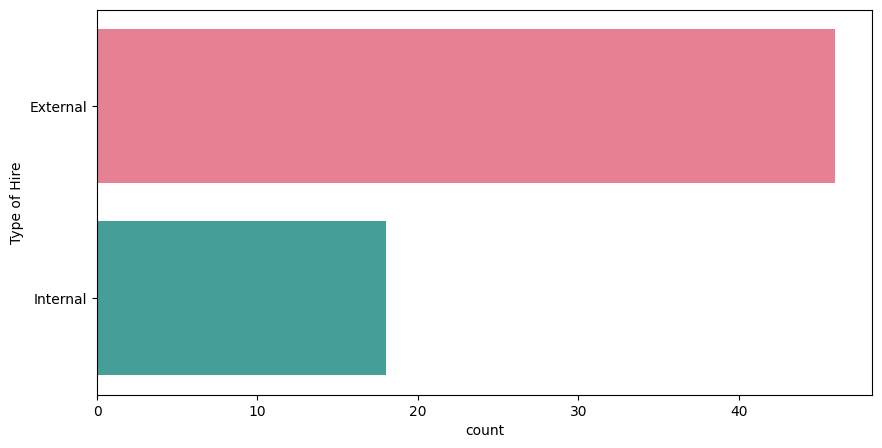

In [43]:
plt.figure(figsize =(10,5))
sns.countplot(df['Type of Hire'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/2560990152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sex'], palette ='husl')


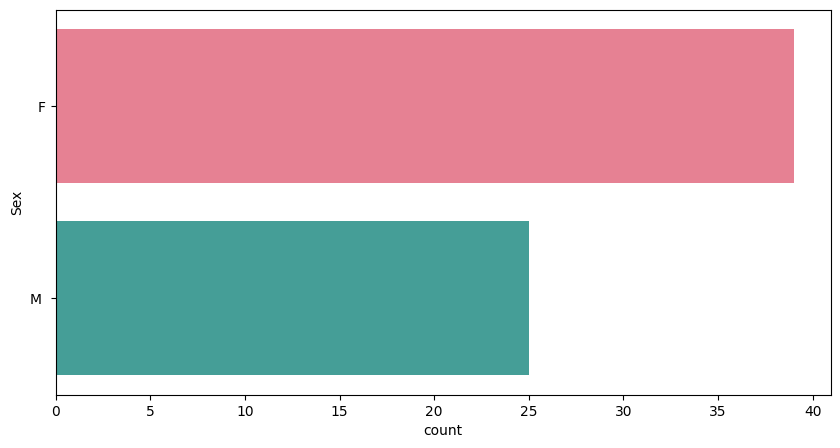

In [44]:
plt.figure(figsize =(10,5))
sns.countplot(df['Sex'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/1223814154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Job Title'], palette ='husl')


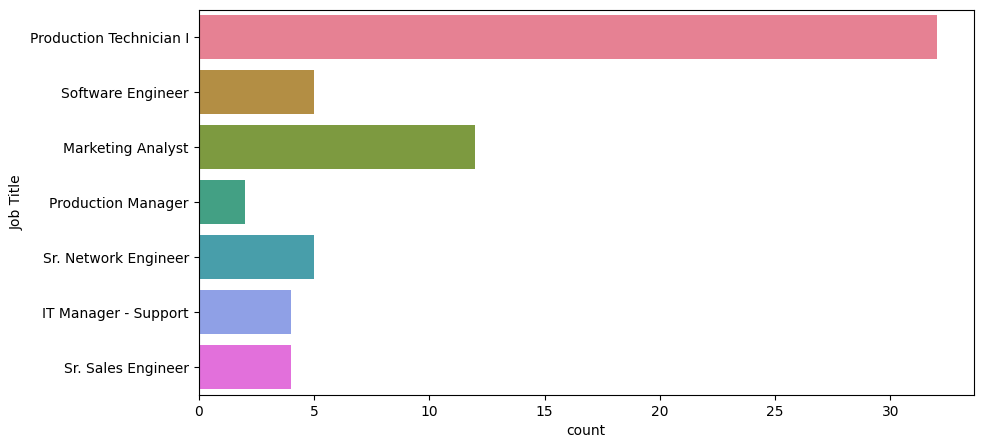

In [45]:
plt.figure(figsize =(10,5))
sns.countplot(df['Job Title'], palette ='husl')
plt.show()

## Analyse Univarié Quantitatif
Dans ces graphs nous nous rendons compte qu'ils existent des variables qui semblent être ordinales catégorielles. Celles-cis sont\
Quarter et Fiscal Year. Sl.Id présente un intérêt faible. 

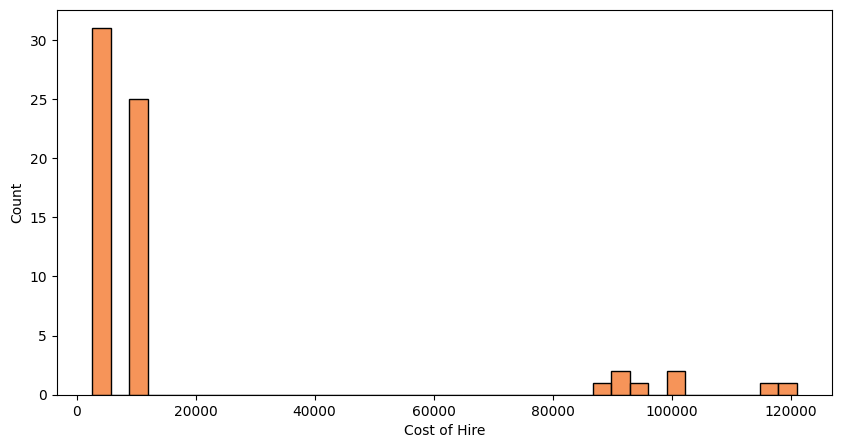

In [46]:
plt.figure(figsize = (10,5))
sns.histplot( df['Cost of Hire'], color ='#F37021')
plt.show()

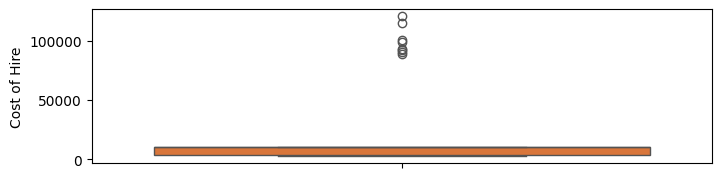

In [47]:
plt.figure(figsize=(8,2))
sns.boxplot(df['Cost of Hire'],color='#F37021')
plt.show()

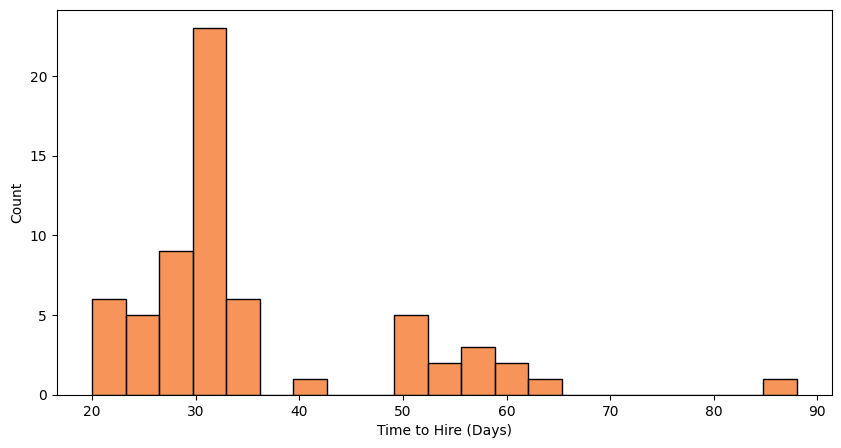

In [48]:
plt.figure(figsize = (10,5))
sns.histplot( df['Time to Hire (Days)'], color ='#F37021')
plt.show()

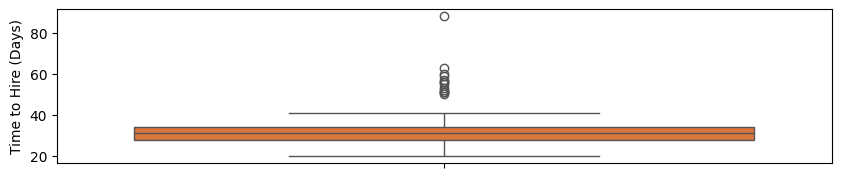

In [49]:
plt.figure(figsize=(10,2))
sns.boxplot(df['Time to Hire (Days)'], color = '#F37021')
plt.show()

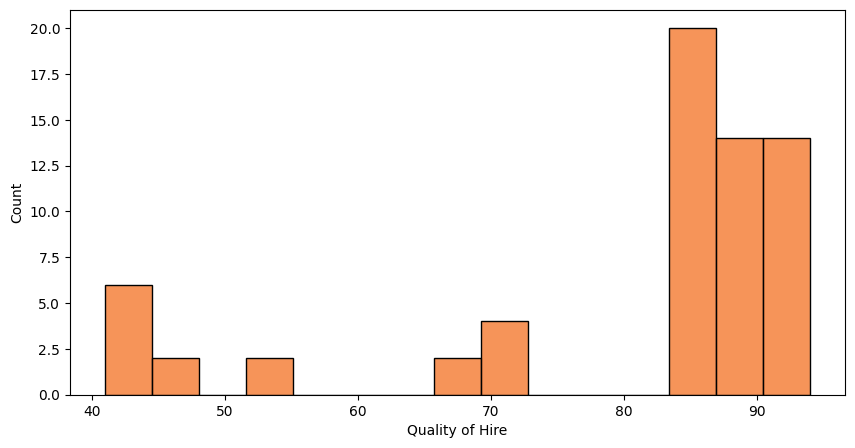

In [50]:
plt.figure(figsize = (10,5))
sns.histplot(df['Quality of Hire'], color ='#F37021')
plt.show()

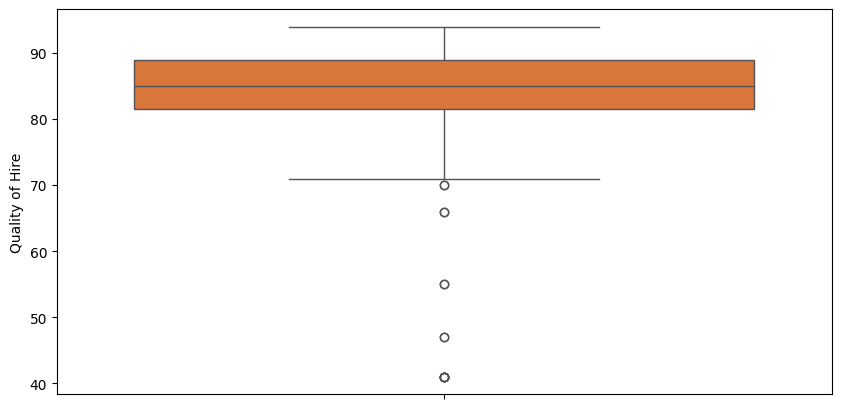

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Quality of Hire'], color='#F37021')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/615792069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Quarter'].value_counts(), palette = 'husl')


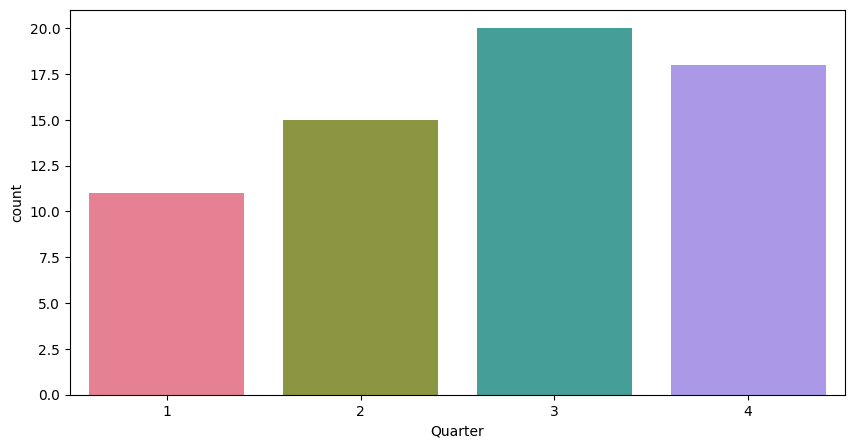

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(df['Quarter'].value_counts(), palette = 'husl')
plt.show()

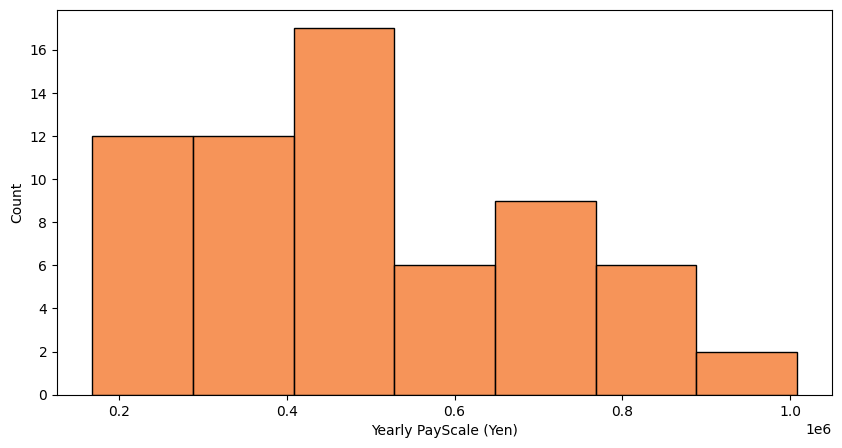

In [53]:
plt.figure(figsize = (10,5))
sns.histplot(df['Yearly PayScale (Yen)'], color = '#F37021')
plt.show()

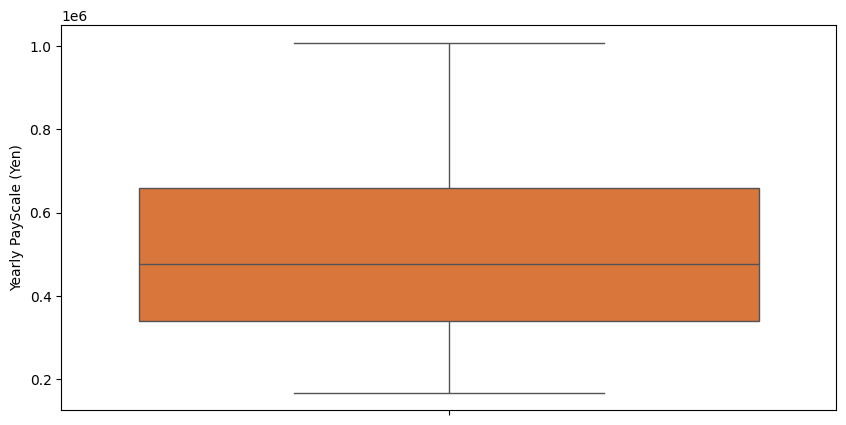

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Yearly PayScale (Yen)'], color = '#F37021')
plt.show()

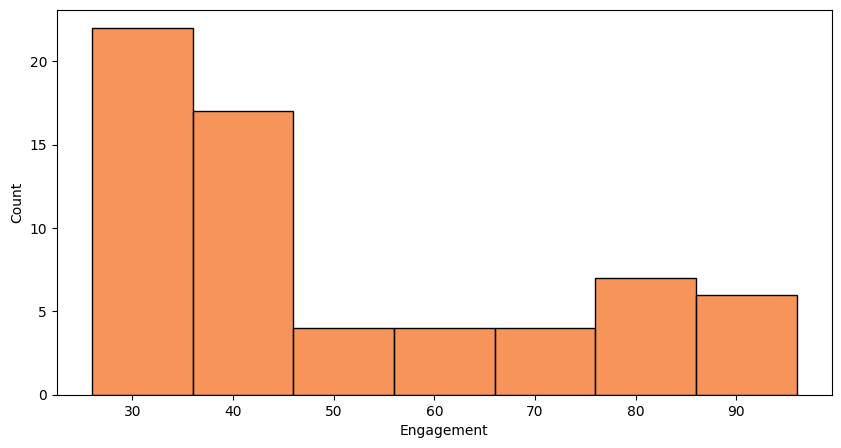

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(df['Engagement'], color='#F37021')
plt.show()

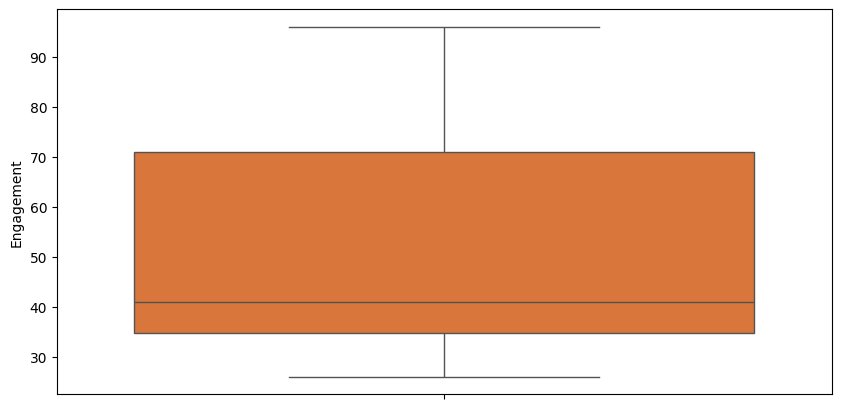

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Engagement'], color = '#F37021')
plt.show()

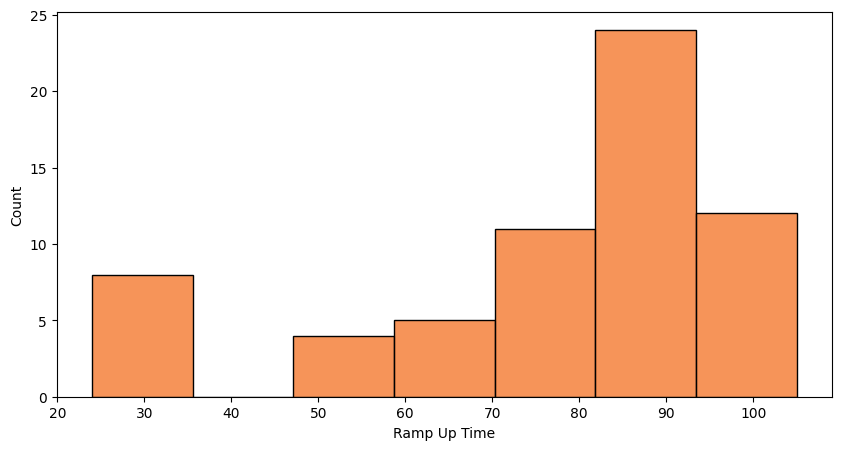

In [57]:
plt.figure(figsize = (10,5))
sns.histplot(df['Ramp Up Time'], color ='#F37021')
plt.show()

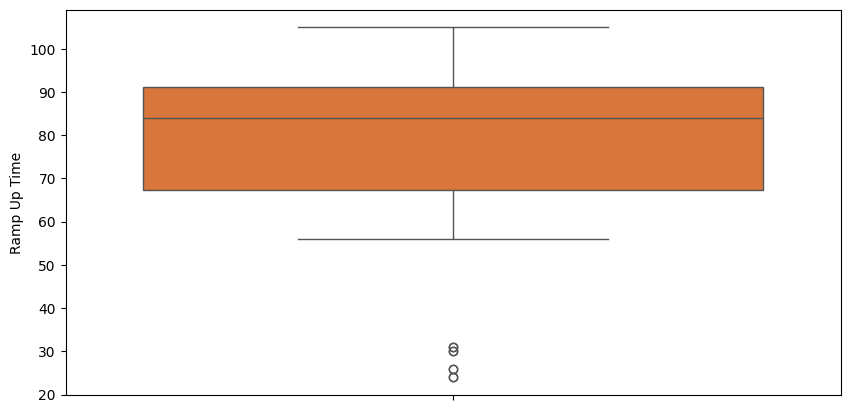

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Ramp Up Time'], color ='#F37021')
plt.show()

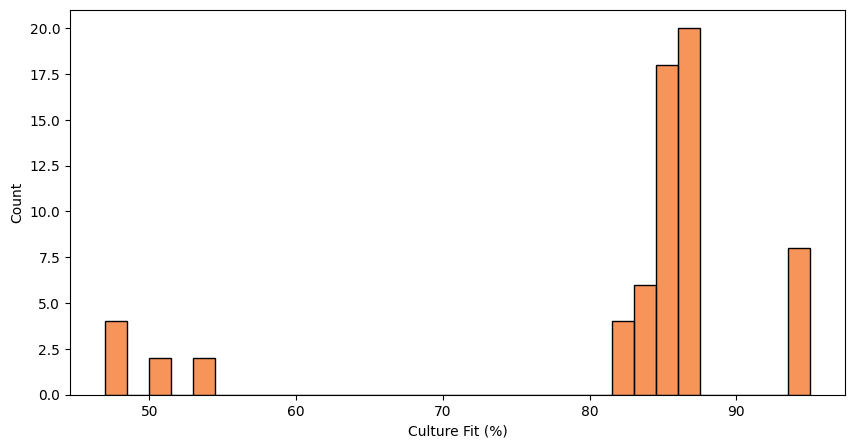

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(df['Culture Fit (%)'], color ='#F37021')
plt.show()

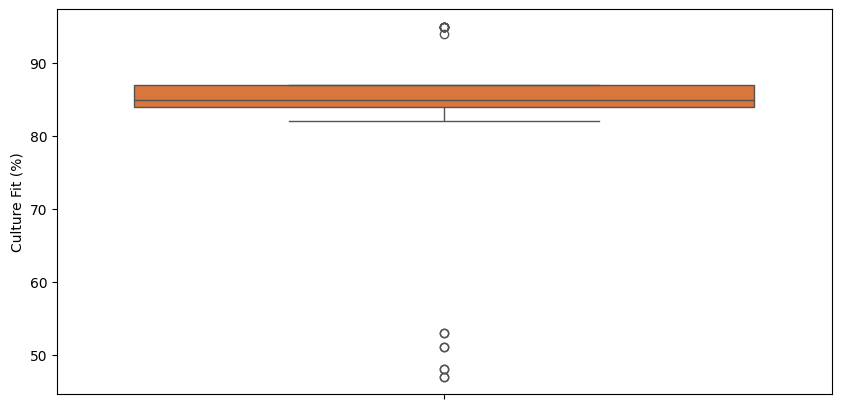

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Culture Fit (%)'], color = '#F37021')
plt.show()

## Analyse Bivarié Qualitatives

In [61]:
df_quant = df.select_dtypes(exclude=int)

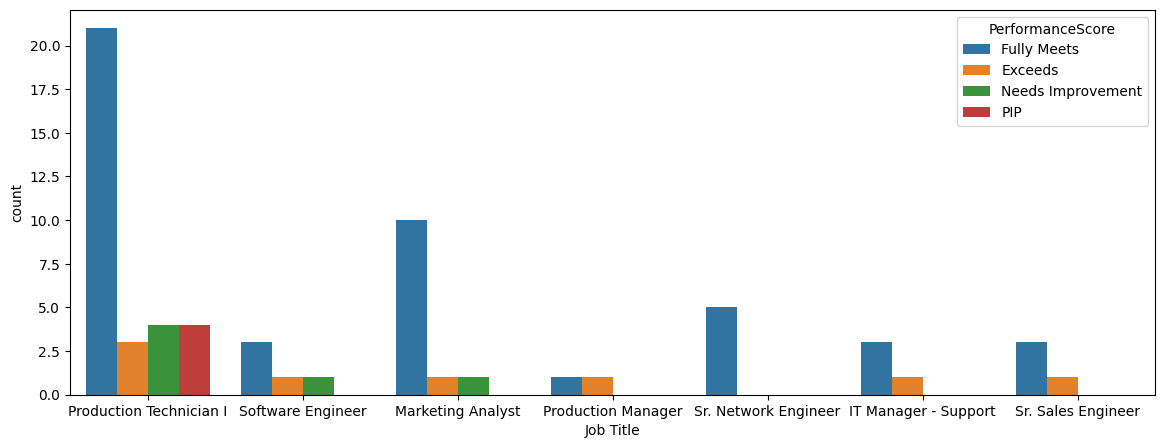

In [62]:
plt.figure(figsize = (14,5))
sns.countplot(df, x = 'Job Title', hue = 'PerformanceScore')
plt.show()

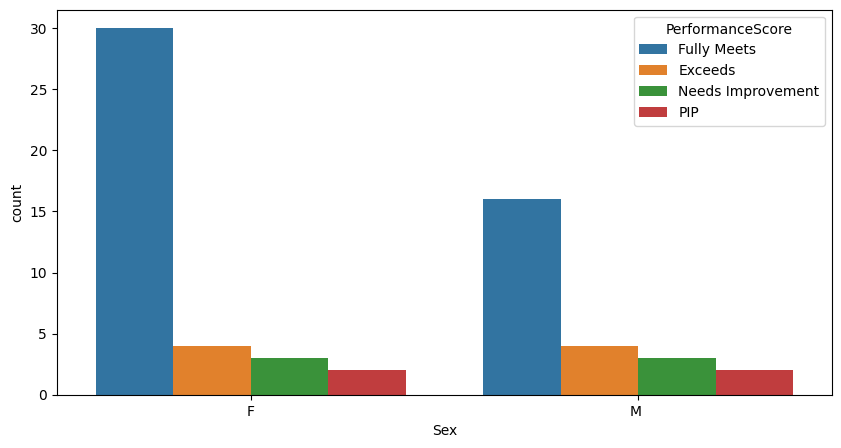

In [63]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Sex', hue='PerformanceScore')
plt.show()

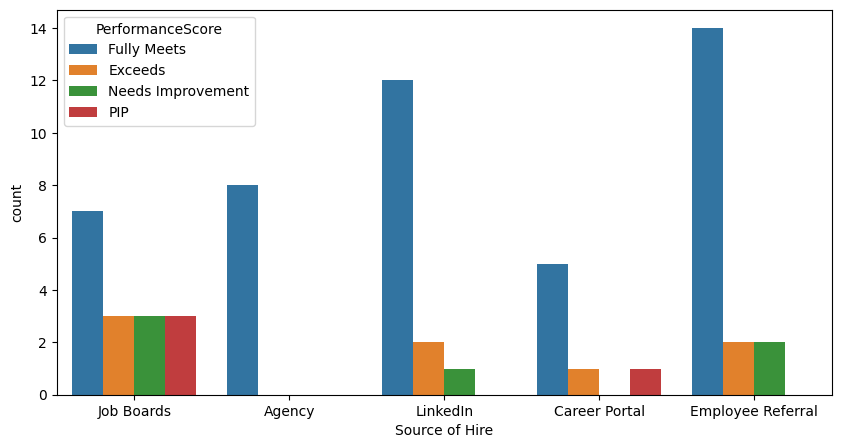

In [64]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Source of Hire', hue='PerformanceScore')
plt.show()

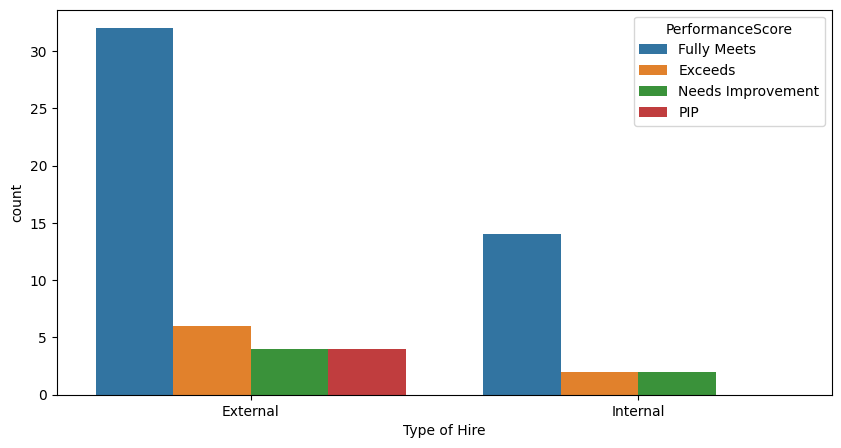

In [65]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Type of Hire', hue='PerformanceScore')
plt.show()

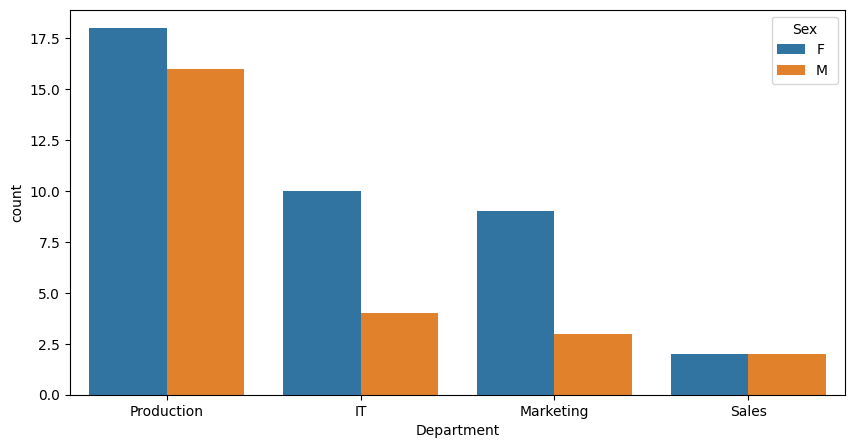

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Department', hue='Sex')
plt.show()

## Analyse Bivarié Quantitatif et Qualitatif

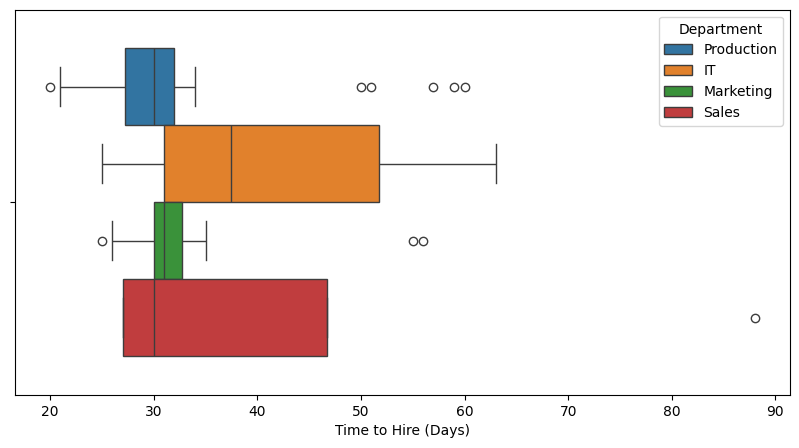

In [67]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x = 'Time to Hire (Days)' , hue = 'Department')
plt.show()

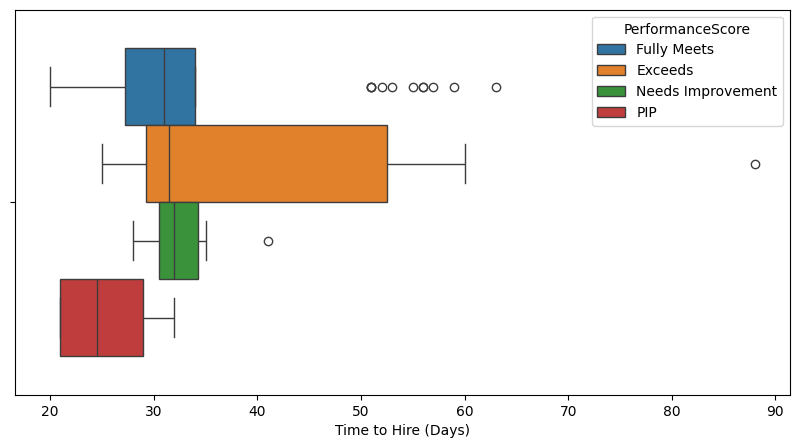

In [68]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Time to Hire (Days)', hue = 'PerformanceScore')
plt.show()

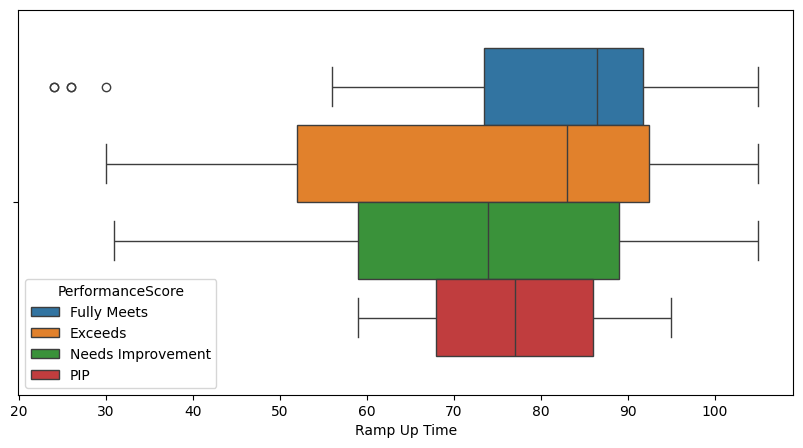

In [69]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Ramp Up Time', hue = 'PerformanceScore')
plt.show()

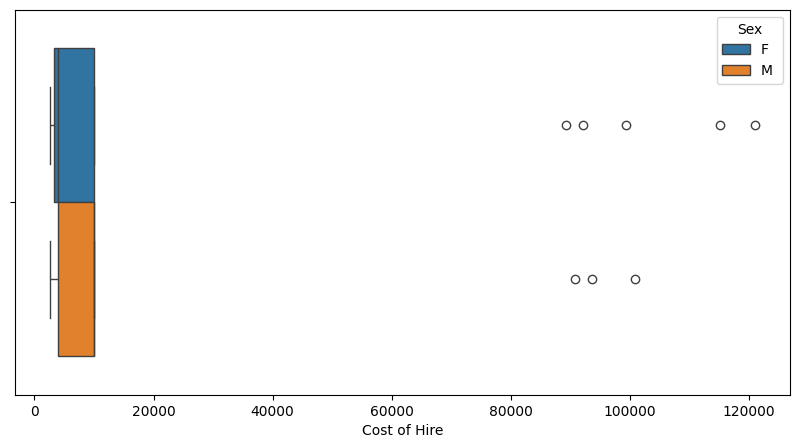

In [70]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Sex')
plt.show()

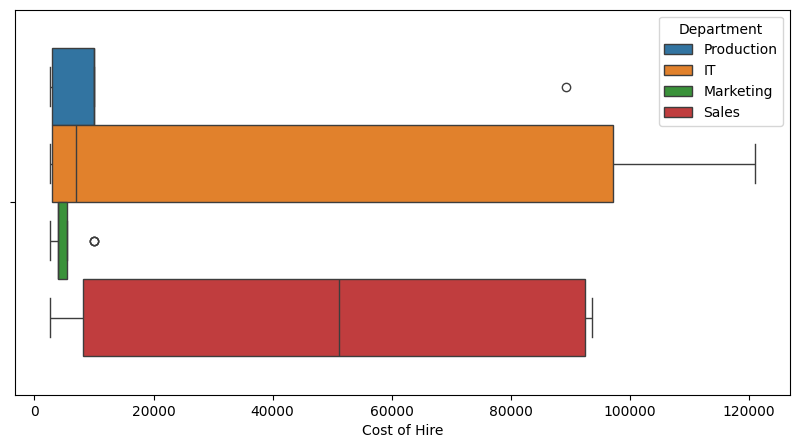

In [71]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Department')
plt.show()

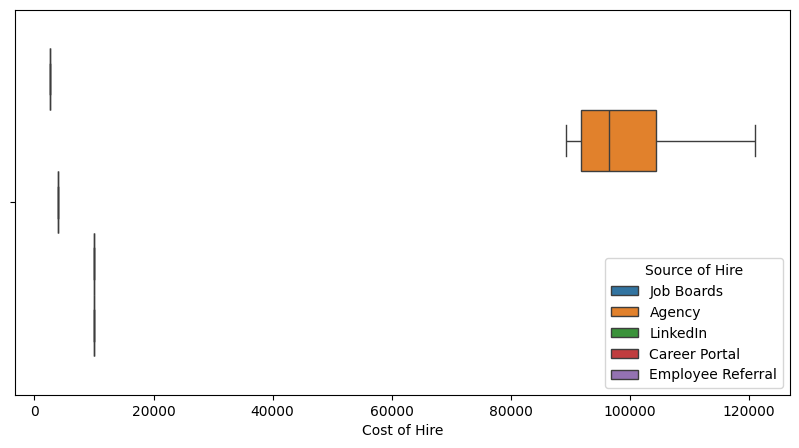

In [72]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Source of Hire')
plt.show()

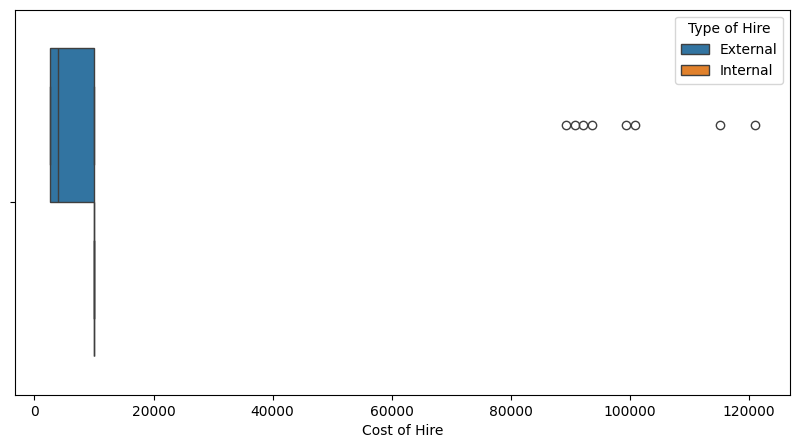

In [73]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Type of Hire')
plt.show()

In [74]:
df.columns

Index(['Sl. No', 'Fiscal Year', 'Quarter', 'Department', 'Job Open Date',
       'Hire Date', 'Job Title', 'Source of Hire', 'Type of Hire',
       'PerformanceScore', 'Sex', 'Yearly PayScale (Yen)', 'Cost of Hire',
       'Time to Hire (Days)', 'Quality of Hire', 'Engagement', 'Ramp Up Time',
       'Culture Fit (%)'],
      dtype='object')

## Analyse Bivarié Quantitatives

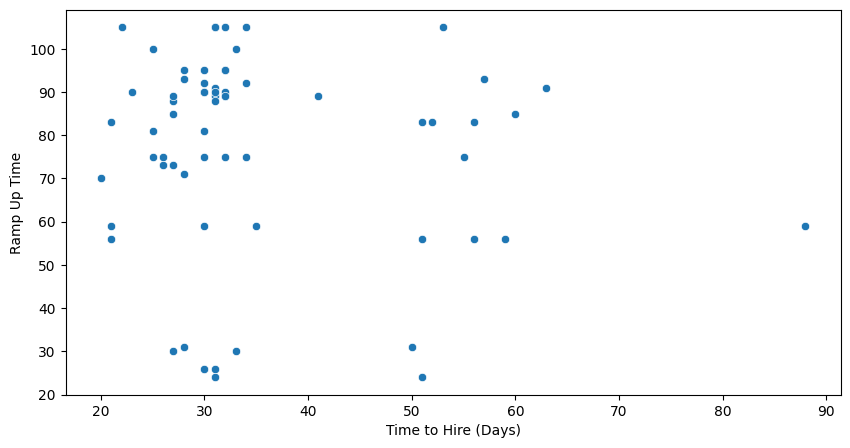

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Ramp Up Time')
plt.show()

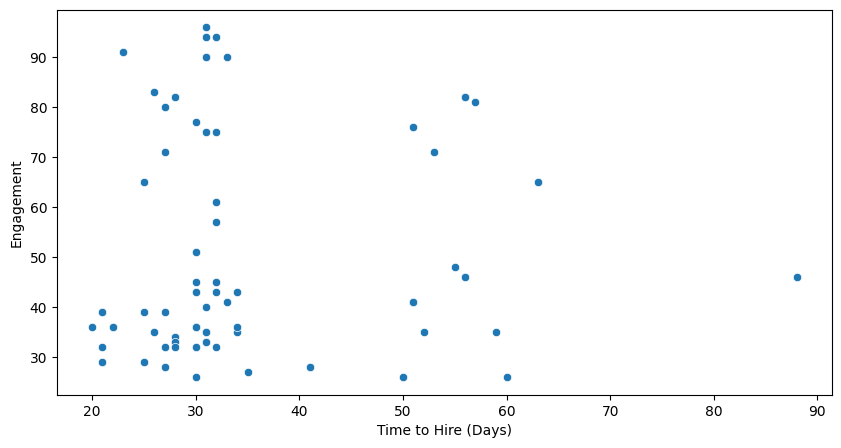

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Engagement')
plt.show()

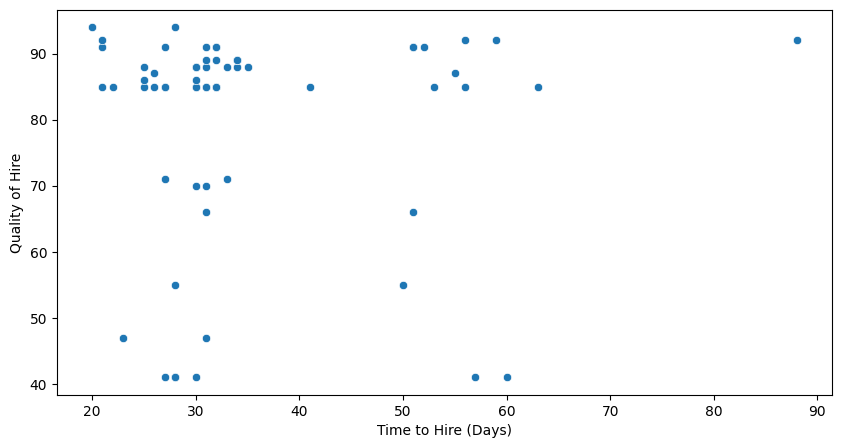

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Quality of Hire')
plt.show()

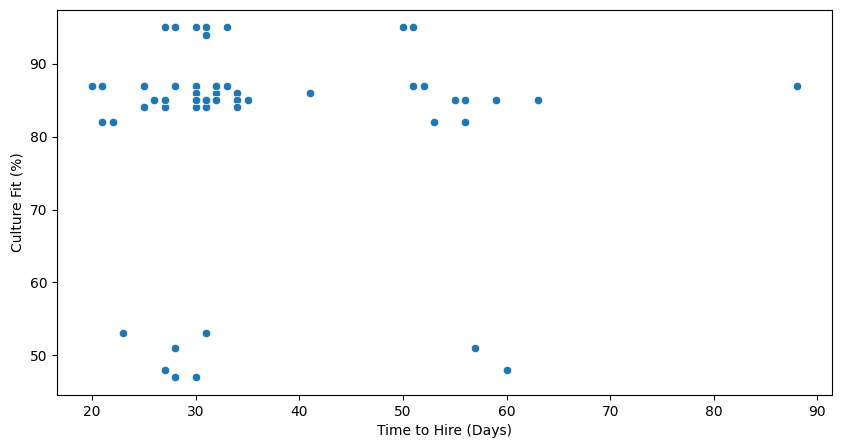

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Culture Fit (%)')
plt.show()

## Analyse Multivarié

In [79]:
df_quant = df.select_dtypes(include = int)


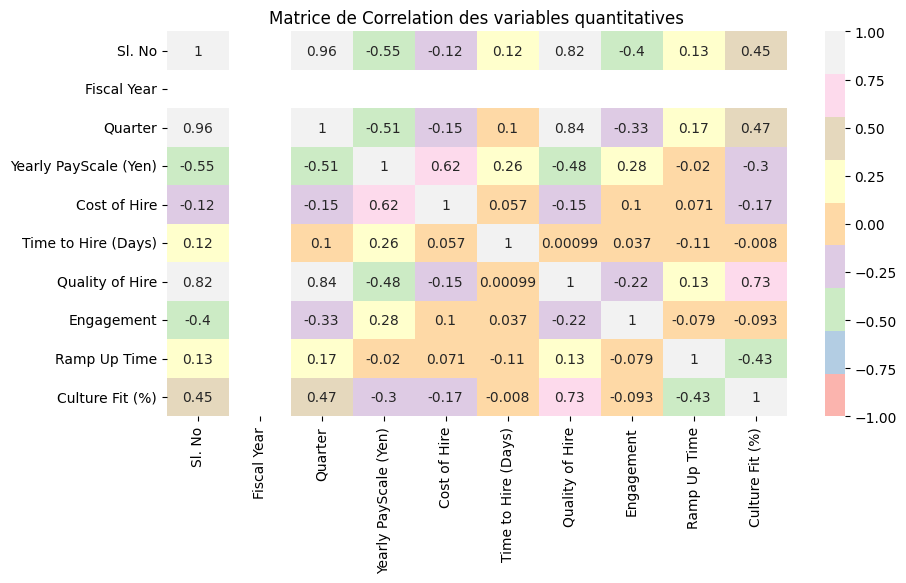

In [80]:
plt.figure(figsize = (10,5))
sns.heatmap(df_quant.corr(),vmin =-1, vmax= +1 , cmap= 'Pastel1', square = False, annot = True)
plt.title('Matrice de Correlation des variables quantitatives')
plt.show()

## c) Préparation des données (recodages, normalisations, etc.)

Les variables qualitatives peuvent être récodés de différentes façons : 
- Binaire : Sex ,  Type of Hire 
- One Hot Encoding : Source of Hire, Department, Job Title, Quarter 
- Multiclasse Ordinale : Performance Score

Modèle ANCOVA - Quant et Qual 
VIF - Multicolinéarité 


In [129]:
# Groups de Variables 
var_quant = df.select_dtypes(include= 'int').columns
var_date = ['Job Open Date', 'Hire Date']
var_quali = ['Department', 'Job Title', 'Source of Hire', 'Type of Hire', 'PerformanceScore', 'Sex']

In [83]:
w_values = [] 
for i in var_quant: 
    norm_fit_base = stats.shapiro(df[i])
    w_values.append(norm_fit_base.statistic) 
    print(f'La variable {i} a un W de {norm_fit_base.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en Scaled : {sum_w:.4f}") 

La variable Sl. No a un W de 0.9551290406738953
La variable Fiscal Year a un W de 1.0
La variable Quarter a un W de 0.8615216813015105
La variable Yearly PayScale (Yen) a un W de 0.9627292441994025
La variable Cost of Hire a un W de 0.48804487770845073
La variable Time to Hire (Days) a un W de 0.7928891380922993
La variable Quality of Hire a un W de 0.702202607568952
La variable Engagement a un W de 0.8463817282820911
La variable Ramp Up Time a un W de 0.8665021429889564
La variable Culture Fit (%) a un W de 0.622471109828972

Somme des W pour la transformation en Scaled : 8.0979


In [96]:
# Standardization --> La standardization semble plus pertinente que la normalisation dans le cadre d'une ANOVA. cf.GPT
scaler = StandardScaler()
var_to_standardize = ["Cost of Hire", "Culture Fit (%)", "Quality of Hire", 
                       "Time to Hire (Days)", "Engagement", "Quarter", "Ramp Up Time"]
df_scaled = df.copy()

* Standardisation Basique

In [97]:
df_scaled = scaler.fit_transform(df_scaled[var_to_standardize])
df_scaled =  pd.DataFrame(df_scaled, columns = var_to_standardize)
df_scaled.head()

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,-0.489412,-2.761887,-2.38095,-0.410829,-0.242366,-1.612913,0.798634
1,2.263141,-2.761887,-2.38095,-0.565495,1.470837,-1.612913,0.798634
2,-0.445735,-2.683222,-2.38095,1.909148,-1.122119,-1.612913,0.359523
3,3.086477,-2.683222,-2.38095,-0.642827,-1.029513,-1.612913,0.359523
4,-0.255148,-2.447226,-2.38095,-0.565495,-0.751697,-1.612913,0.710812


In [99]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_scaled = stats.shapiro(df_scaled[i])
    w_values.append(norm_fit_scaled.statistic) 
    print(f'La variable {i} a un W de {norm_fit_scaled.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en Scaled : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.48804487770845106
La variable Culture Fit (%) a un W de 0.6224711098289717
La variable Quality of Hire a un W de 0.702202607568952
La variable Time to Hire (Days) a un W de 0.7928891380922993
La variable Engagement a un W de 0.8463817282820909
La variable Quarter a un W de 0.8615216813015101
La variable Ramp Up Time a un W de 0.8665021429889564

Somme des W pour la transformation en Scaled : 5.1800


* Standardisation Log

In [100]:
df_scaled_log = df.copy()
for i in var_to_standardize: 
    df_scaled_log[i] = np.log1p(df[i])

In [101]:
df_scaled_log = pd.DataFrame(df_scaled_log,columns = var_to_standardize)
df_scaled_log.head()

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,7.873217,3.871201,3.73767,3.433987,3.828641,0.693147,4.564348
1,11.399544,3.871201,3.73767,3.367296,4.418841,0.693147,4.564348
2,8.294300,3.891820,3.73767,4.110874,3.295837,0.693147,4.454347
3,11.654434,3.891820,3.73767,3.332205,3.367296,0.693147,4.454347
4,9.210440,3.951244,3.73767,3.367296,3.555348,0.693147,4.543295


In [102]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_log = stats.shapiro(df_scaled_log[i])
    w_values.append(norm_fit_log.statistic) 
    print(f'La variable {i} a un W de {norm_fit_log.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en log : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.7730834359225216
La variable Culture Fit (%) a un W de 0.5739697660645473
La variable Quality of Hire a un W de 0.6537348554615449
La variable Time to Hire (Days) a un W de 0.8875274584143844
La variable Engagement a un W de 0.9006412109469445
La variable Quarter a un W de 0.8367417839946811
La variable Ramp Up Time a un W de 0.7570902034518016

Somme des W pour la transformation en log : 5.3828


* Standardization Sqrt 

In [104]:
df_scaled_sqrt = df.copy()
for i in var_to_standardize: 
    df_scaled_sqrt[i] = np.sqrt(df_scaled_sqrt[i])

In [105]:
df_scaled_sqrt = pd.DataFrame(df_scaled_log, columns = var_to_standardize)
df_scaled_sqrt

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,51.234754,6.855655,6.403124,5.477226,6.708204,1.0,9.746794
1,298.797590,6.855655,6.403124,5.291503,9.055385,1.0,9.746794
2,63.245553,6.928203,6.403124,7.745967,5.099020,1.0,9.219544
3,339.411255,6.928203,6.403124,5.196152,5.291503,1.0,9.219544
4,100.000000,7.141428,6.403124,5.291503,5.830952,1.0,9.643651
...,...,...,...,...,...,...,...
59,51.234754,9.327379,9.591663,9.380832,6.782330,2.0,7.681146
60,63.245553,9.219544,9.591663,7.483315,6.782330,2.0,7.483315
61,100.000000,9.219544,9.591663,7.681146,5.916080,2.0,7.483315
62,100.000000,9.327379,9.695360,4.472136,6.000000,2.0,8.366600


In [106]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_sqrt= stats.shapiro(df_scaled_sqrt[i])
    w_values.append(norm_fit_sqrt.statistic) 
    print(f'La variable {i} a un W de {norm_fit_log.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en sqrt : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.7570902034518016
La variable Culture Fit (%) a un W de 0.7570902034518016
La variable Quality of Hire a un W de 0.7570902034518016
La variable Time to Hire (Days) a un W de 0.7570902034518016
La variable Engagement a un W de 0.7570902034518016
La variable Quarter a un W de 0.7570902034518016
La variable Ramp Up Time a un W de 0.7570902034518016

Somme des W pour la transformation en sqrt : 5.2636


* Standardization BoxCox

In [107]:
df_scaled_box = df.copy()

for i in var_to_standardize :
    df_scaled_box[i], _ = stats.boxcox(df_scaled_box[i] + 1)  # +1 pour éviter les zéros

df_scaled_box =  pd.DataFrame(df_scaled_box, columns = var_to_standardize)
df_scaled_box.head()

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,1.795072,1.182887e+09,5.752975e+07,0.775632,1.146757,1.106464,11986.126323
1,1.815615,1.182887e+09,5.752975e+07,0.774753,1.165686,1.106464,11986.126323
2,1.800030,1.334615e+09,5.752975e+07,0.781364,1.119472,1.106464,9374.894512
3,1.816066,1.334615e+09,5.752975e+07,0.774259,1.123875,1.106464,9374.894512
4,1.807563,1.889758e+09,5.752975e+07,0.774753,1.134277,1.106464,11435.493424


In [108]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_box = stats.shapiro(df_scaled_box[i])
    w_values.append(norm_fit_box.statistic) 
    print(f'La variable {i} a un W de {norm_fit_box.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation Box-Cox : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.8604860037394088
La variable Culture Fit (%) a un W de 0.8125644391794867
La variable Quality of Hire a un W de 0.8544643085266577
La variable Time to Hire (Days) a un W de 0.9432234673954638
La variable Engagement a un W de 0.9298500572832479
La variable Quarter a un W de 0.8627979132043399
La variable Ramp Up Time a un W de 0.9377877788982929

Somme des W pour la transformation Box-Cox : 6.2012


* **Commentaire** : 
Le test de Shapiro donne les mêmes résultats, cela signifie que les données restent non normales après la standardisation.

In [112]:
df_remaining = df.drop(columns = var_to_standardize)
df_standardized = pd.concat([df_remaining, df_scaled], axis = 1)
df_standardized.head()

,Sl. No,Fiscal Year,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,1,2018,Production,04/01/2018,03/02/2018,Production Technician I,Job Boards,External,Fully Meets,F,744000,-0.489412,-2.761887,-2.38095,-0.410829,-0.242366,-1.612913,0.798634
1,2,2018,Production,05/01/2018,02/02/2018,Production Technician I,Agency,External,Fully Meets,F,744000,2.263141,-2.761887,-2.38095,-0.565495,1.470837,-1.612913,0.798634
2,3,2018,Production,04/02/2018,05/04/2018,Production Technician I,LinkedIn,External,Exceeds,F,660000,-0.445735,-2.683222,-2.38095,1.909148,-1.122119,-1.612913,0.359523
3,4,2018,IT,04/02/2018,03/03/2018,Software Engineer,Agency,External,Fully Meets,F,960000,3.086477,-2.683222,-2.38095,-0.642827,-1.029513,-1.612913,0.359523
4,5,2018,Production,04/02/2018,04/03/2018,Production Technician I,Career Portal,External,Fully Meets,M,660000,-0.255148,-2.447226,-2.38095,-0.565495,-0.751697,-1.612913,0.710812


* Encodage Ordinal 

In [116]:
ordinal_cat = [['PIP','Needs Improvement','Fully Meets','Exceeds']]
encoder = OrdinalEncoder(categories= ordinal_cat)
df_standardized['PerformanceScore'] = encoder.fit_transform(df_standardized[['PerformanceScore']])

* Encodage Binaire 

In [118]:
encoder = LabelEncoder()
df_standardized['Sex']= encoder.fit_transform(df_standardized['Sex'])

In [119]:
df_standardized.columns

Index(['Sl. No', 'Fiscal Year', 'Department', 'Job Open Date', 'Hire Date',
       'Job Title', 'Source of Hire', 'Type of Hire', 'PerformanceScore',
       'Sex', 'Yearly PayScale (Yen)', 'Cost of Hire', 'Culture Fit (%)',
       'Quality of Hire', 'Time to Hire (Days)', 'Engagement', 'Quarter',
       'Ramp Up Time'],
      dtype='object')

In [120]:
# I ere étape OHE. 
df_encoded_ = pd.get_dummies(df, columns =var_quali, drop_first=True)
print(df_encoded_.columns)

Index(['Sl. No', 'Fiscal Year', 'Quarter', 'Job Open Date', 'Hire Date',
       'Yearly PayScale (Yen)', 'Cost of Hire', 'Time to Hire (Days)',
       'Quality of Hire', 'Engagement', 'Ramp Up Time', 'Culture Fit (%)',
       'Department_Marketing', 'Department_Production', 'Department_Sales',
       'Job Title_Marketing Analyst', 'Job Title_Production Manager',
       'Job Title_Production Technician I', 'Job Title_Software Engineer',
       'Job Title_Sr. Network Engineer', 'Job Title_Sr. Sales Engineer',
       'Source of Hire_Career Portal', 'Source of Hire_Employee Referral',
       'Source of Hire_Job Boards', 'Source of Hire_LinkedIn',
       'Type of Hire_Internal', 'PerformanceScore_Fully Meets',
       'PerformanceScore_Needs Improvement', 'PerformanceScore_PIP', 'Sex_M '],
      dtype='object')


In [131]:
var_date.append('Fiscal Year')

In [132]:
df_encoded__wo_date = df_encoded_.drop(columns = var_date)
corr_matrix = df_encoded__wo_date.corr()

In [133]:
# II eme Étape OHE 
df_encoded_ = df_encoded_.applymap(lambda x : 1 if x is True else (0 if x is False else x))

# Pas de changement dans Matrice de Correlation si Avant ou Après.

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_42800/1956715653.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded_ = df_encoded_.applymap(lambda x : 1 if x is True else (0 if x is False else x))


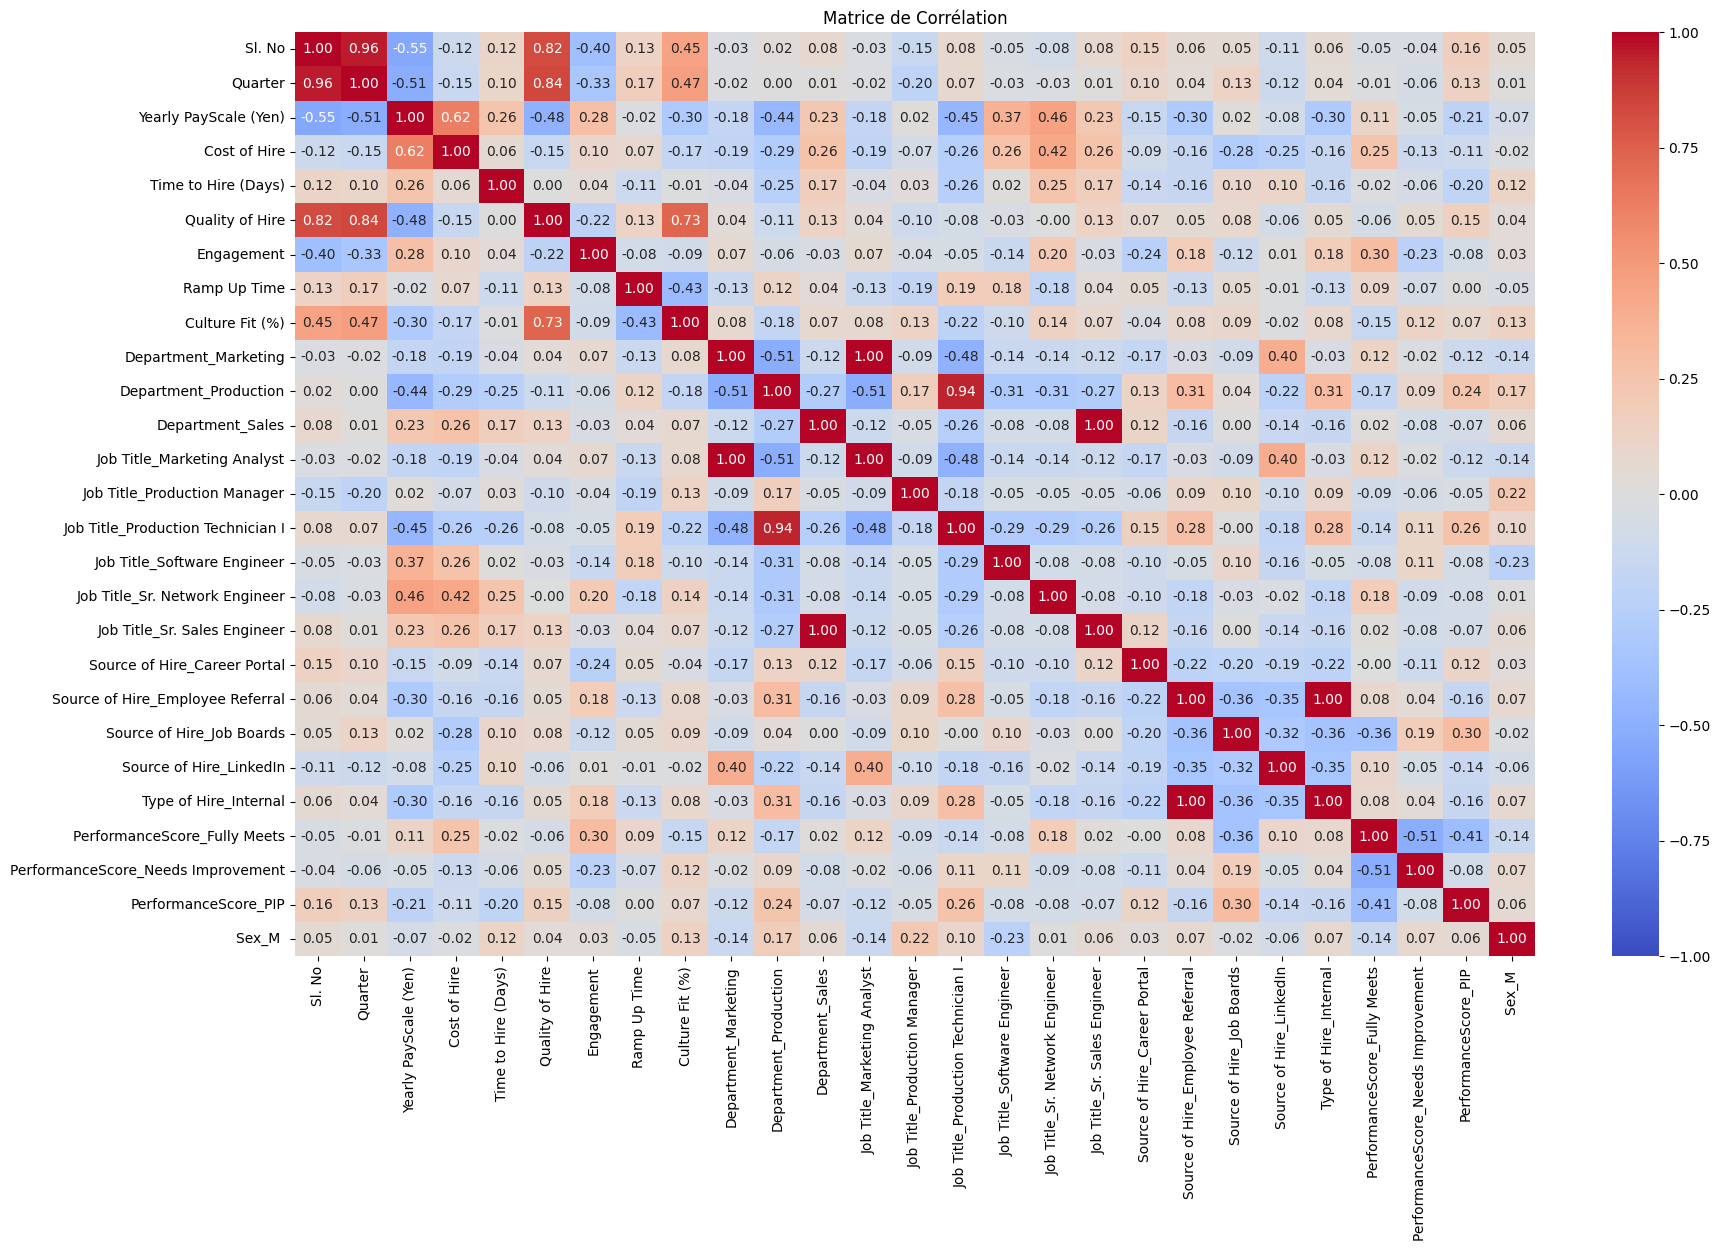

In [134]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot = True , cmap = 'coolwarm', 
            fmt='.2f',vmin = -1,vmax =1)
plt.title("Matrice de Corrélation")
plt.show()
#Fiscal Year : les éléments d'une colonne ont la même valeur,
#  la corrélation ne peut pas être calculée

Pour analyser les corrélations dans ton correlogramme :

1.Variables explicatives corrélées entre elles
- Yearly PayScale (Yen)" et "Cost of Hire" ont une forte corrélation positive (0.62).
- Quality of Hire est fortement corrélée avec Culture Fit (%) (0.73).
- Engagement et Quality of Hire sont aussi bien corrélés (0.84).
- Quarter" et Sl. No. sont quasi parfaitement corrélés (0.96), probablement parce que Sl. No. est un identifiant séquentiel.

2.Corrélations avec les variables cibles :
 
   - Cost of Hire :
     - Fortement corrélée avec "Yearly PayScale (Yen)" (0.62), ce qui est logique.
     - Modérément corrélée avec "Culture Fit (%)" (0.26).
   - Quality of Hire:
     - Très corrélée avec "Culture Fit (%)" (0.73) et "Engagement" (0.84), ce qui suggère que ces variables influencent fortement la qualité des recrutements.
   - Time to Hire (Days) :
     - Peu de corrélations marquées, mais on voit des liens modérés avec "Performance Score" (0.27) et "Quarter" (0.30).
On peut voir que des catégories sont corrélées presque a 1 commme job title production avec departmenent production ce qui est normale.

Pour que la variable ait un impact entre la variable cible et la variable explicative, il faut qu'il y ait une corrélation entre 0,3 à 0,7.

Pour la variable Cost to Hire, nous pouvons voir que Yearly PayScale (Yen)

In [135]:

df_encoded_[var_date[0]] = pd.to_datetime(df_encoded_[var_date[0]], errors= 'coerce')
df_encoded_[var_date[1]] = pd.to_datetime(df_encoded_[var_date[1]], errors= 'coerce')
df_encoded_[var_date].dtypes

Job Open Date    datetime64[ns]
Hire Date        datetime64[ns]
Fiscal Year               int64
dtype: object

A ce stade plusieurs commandes comme le VIF ou celle qui est ci-dessus n'ont pas été utilisées.

### **TEST ANOVA**
- H0 : Categories de variable indépendante seront sans effet sur variable dépendante.
- H1 : Cela signifie que l'une ou plusieurs des moyennes de groupe diffèrent des autres.

:point right:

In [210]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
df = df.rename(columns={"Time to Hire (Days)": "Time_to_Hire_Days"})
df = df.rename(columns={"Job Title": "Job_Title"})
df = df.rename(columns={"Source of Hire": "Source_of_Hire"})
df = df.rename(columns={"Type of Hire": "Type_of_Hire"})

In [215]:
model = ols('Time_to_Hire_Days ~ Department', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ =2)
print(f"ANOVA for Time to Hire (Days) ~ Department")
print(anova_table)

ANOVA for Time to Hire (Days) ~ Department
                 sum_sq    df         F    PR(>F)
Department  1052.892157   3.0  2.182418  0.099404
Residual    9648.857843  60.0       NaN       NaN


In [216]:
model = ols('Time_to_Hire_Days ~ Job_Title', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ Job_Title")
print(anova_table)
print("\n")

ANOVA for Time to Hire (Days) ~ Job_Title
                sum_sq    df         F    PR(>F)
Job_Title  1393.883333   6.0  1.422656  0.221947
Residual   9307.866667  57.0       NaN       NaN




In [217]:
model = ols('Time_to_Hire_Days ~ Source_of_Hire', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ Source of Hire")
print(anova_table)

ANOVA for Time to Hire (Days) ~ Source of Hire
                      sum_sq    df         F    PR(>F)
Source_of_Hire    627.997222   4.0  0.919514  0.458739
Residual        10073.752778  59.0       NaN       NaN


In [218]:
model = ols('Time_to_Hire_Days ~ PerformanceScore', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ PerformaceScore")
print(anova_table)

ANOVA for Time to Hire (Days) ~ PerformaceScore
                       sum_sq    df         F    PR(>F)
PerformanceScore   875.940217   3.0  1.782937  0.160053
Residual          9825.809783  60.0       NaN       NaN


In [220]:
model = ols('Time_to_Hire_Days ~ Sex', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ Sex")
print(anova_table)

ANOVA for Time to Hire (Days) ~ Sex
                sum_sq    df         F    PR(>F)
Sex         158.812564   1.0  0.933931  0.337598
Residual  10542.937436  62.0       NaN       NaN


In [221]:
model = ols('Time_to_Hire_Days ~ C(Department) * C(Job_Title)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ C(Department) * C(Job Title)")
print(anova_table)


ANOVA for Time to Hire (Days) ~ C(Department) * C(Job Title)
                                 sum_sq    df         F    PR(>F)
C(Department)                       NaN   3.0       NaN       NaN
C(Job_Title)                        NaN   6.0       NaN       NaN
C(Department):C(Job_Title)  3096.416667  18.0  1.053444  0.387968
Residual                    9307.866667  57.0       NaN       NaN


/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraint

In [222]:
model = ols('Time_to_Hire_Days ~ C(Department) * C(Source_of_Hire)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ C(Department) * C(Source of Hire)")
print(anova_table)
print("\n")

ANOVA for Time to Hire (Days) ~ C(Department) * C(Source of Hire)
                                      sum_sq    df         F    PR(>F)
C(Department)                     277.357447   3.0  0.731655  0.486400
C(Source_of_Hire)                 365.294524   4.0  0.722722  0.490636
C(Department):C(Source_of_Hire)  4682.854958  12.0  3.088285  0.005285
Residual                         6065.315079  48.0       NaN       NaN




/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 9
  warnings.warn('covariance of constraints does not have full '


In [225]:
model = ols('Time_to_Hire_Days ~ C(Type_of_Hire) * C(Job_Title)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ C(Type of Hire) * C(Job Title)")
print(anova_table)

# L'effet de Type of Hire  pourrait varier selon les Job Title. Par exemple,
#  certains titres de poste peuvent être plus souvent associés à des 
# embauches internes, tandis que d'autres nécessitent des recrutements 
# externes.

ANOVA for Time to Hire (Days) ~ C(Type of Hire) * C(Job Title)
                                   sum_sq    df         F    PR(>F)
C(Type_of_Hire)                       NaN   1.0       NaN       NaN
C(Job_Title)                   486.288636   6.0  0.491281  0.742099
C(Type_of_Hire):C(Job_Title)   846.445513   6.0  0.855135  0.496930
Residual                      8743.569658  53.0       NaN       NaN


/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Users/ezequielhurtado/Desktop/PROJETS/Econométrie_Dimby/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraint

In [226]:
model = ols('Time_to_Hire_Days ~ C(Type_of_Hire) * C(Sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA Table
print(f"ANOVA for Time to Hire (Days) ~ C(Type of Hire) * C(Sex)")
print(anova_table)


ANOVA for Time to Hire (Days) ~ C(Type of Hire) * C(Sex)
                              sum_sq    df         F    PR(>F)
C(Type_of_Hire)           296.166606   1.0  1.739772  0.192180
C(Sex)                    189.325788   1.0  1.112157  0.295842
C(Type_of_Hire):C(Sex)     32.791114   1.0  0.192625  0.662317
Residual                10213.979716  60.0       NaN       NaN


In [261]:
X = df_encoded_.drop(columns=['Time to Hire (Days)'])
X =X.apply(pd.to_numeric, errors ='coerce')
Y = df_encoded_['Time to Hire (Days)']
pd.to_numeric(Y,errors ='coerce')
X = sm.add_constant(X)

In [268]:
model = sm.OLS(Y,X).fit()
print(model.summary())
print(f'AIC : {model.aic}')
print(f'BIC : {model.bic}')

                             OLS Regression Results                            
Dep. Variable:     Time to Hire (Days)   R-squared:                       0.114
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     2.584
Date:                 Tue, 28 Jan 2025   Prob (F-statistic):             0.0615
Time:                         22:12:23   Log-Likelihood:                -250.74
No. Observations:                   64   AIC:                             509.5
Df Residuals:                       60   BIC:                             518.1
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## d) Définition et estimation du modèle explicatif et/oi prédictif à partir des données.

Suivre le cours (Independance et Selection de Variables)

## e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage.

## f) Intérpretaion, bilan et conclusion.